In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# 1. DOWNLOAD THE DATASET

# 2.LOAD THE DATASET

In [2]:
data = pd.read_csv(r"C:\Users\laksh\Downloads\abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# ADD 1.5+RINGS AND NAME IT AS AGE

In [3]:
Age=1.5+data.Rings
data["Age"]=Age
data=data.rename(columns = {'Whole weight':'Whole_weight','Shucked weight': 'Shucked_weight','Viscera weight': 'Viscera_weight',
                            'Shell weight': 'Shell_weight'})
data=data.drop(columns=["Rings"],axis=1)
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# 3.VISUALIZATIONS

# (i)Univariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

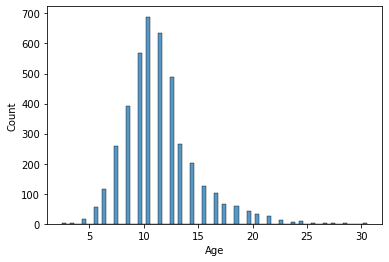

In [4]:
sns.histplot(data["Age"])

<AxesSubplot:>

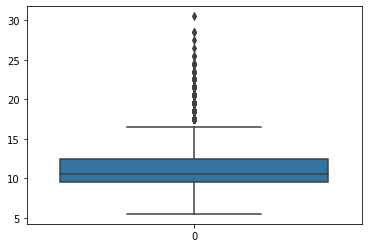

In [57]:
sns.boxplot(data['Age'])

<AxesSubplot:xlabel='Age', ylabel='count'>

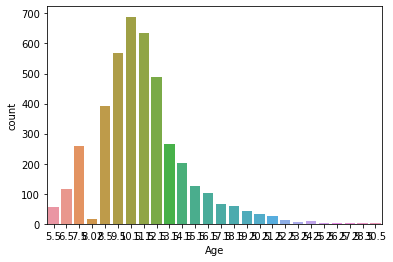

In [58]:
sns.countplot(x=data.Age)

# (ii)Bi-Variate Analysis

<AxesSubplot:xlabel='Age', ylabel='Length'>

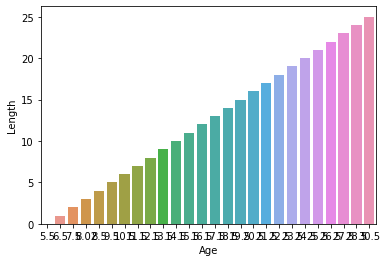

In [63]:
sns.barplot(x=data.Age, y=data.Length)

<AxesSubplot:xlabel='Age', ylabel='Length'>

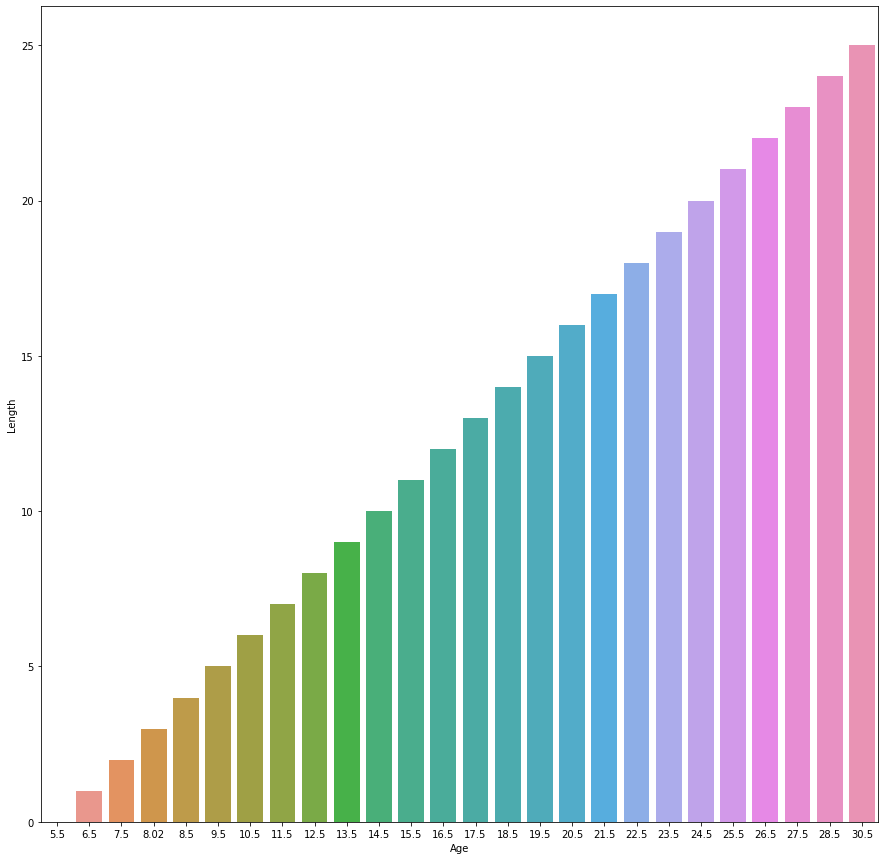

In [64]:
plt.figure(figsize=(15,15))
sns.barplot(x=data.Age , y=data.Length)

<AxesSubplot:>

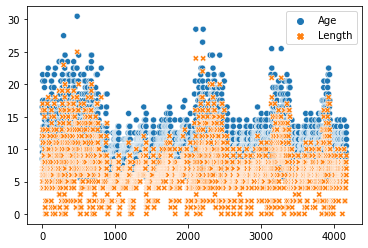

In [65]:
sns.scatterplot((data['Age'], data['Length']))

# (iii)Multi-Variate Analysis

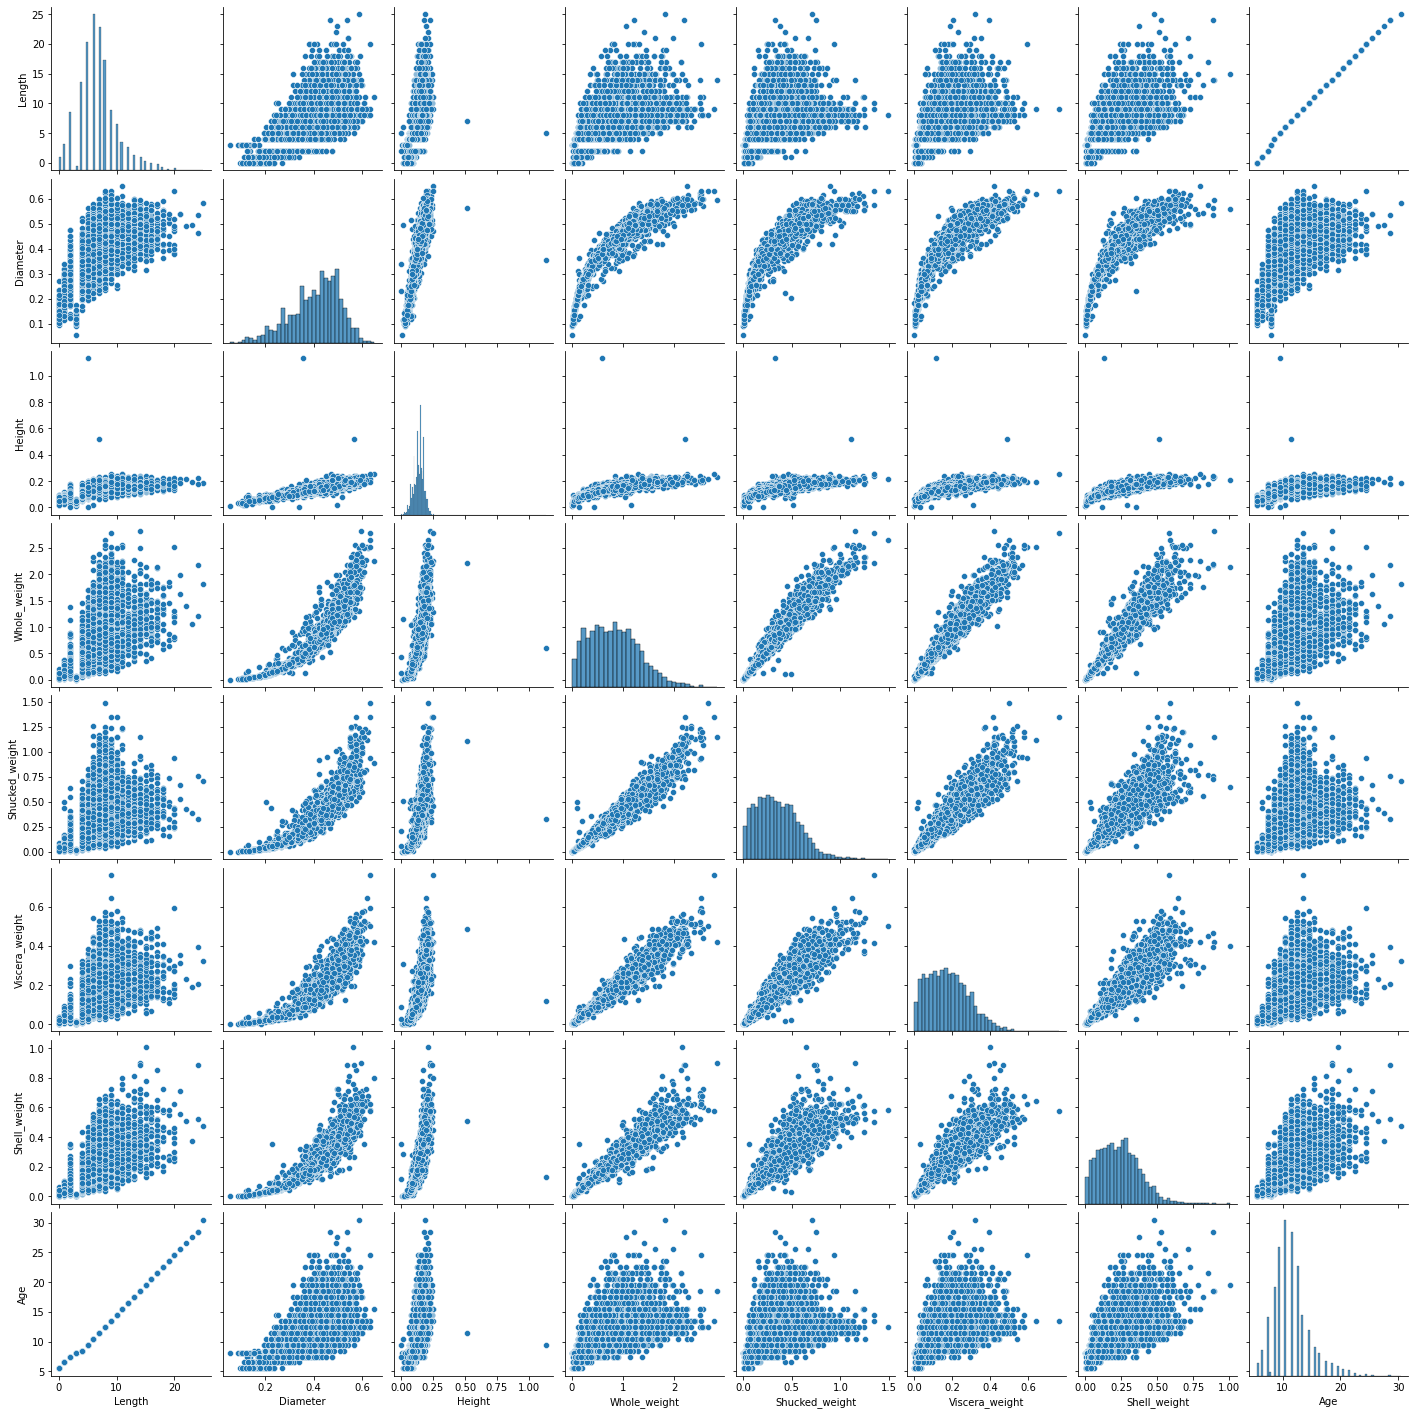

In [66]:
sns.pairplot(data)

<AxesSubplot:>

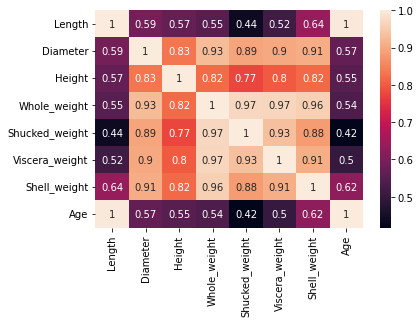

In [67]:
sns.heatmap(data.corr(), annot = True)

# 4.DESCRIPTIVE STATISTICS

In [69]:
data[['Age','Length']].mean()

Age       11.448729
Length     6.843189
dtype: float64

In [70]:
data[['Age','Length']].median()

Age       10.5
Length     6.0
dtype: float64

In [71]:
data[['Age','Length']].mode()

,Age,Length
0,10.5,6


In [72]:
data[['Age','Length']].var()

Age       10.235607
Length    11.259169
dtype: float64

In [73]:
data[['Age','Length']].std()

Age       3.199314
Length    3.355468
dtype: float64

In [74]:
data[['Age','Length']].describe()

,Age,Length
count,4177.000000,4177.000000
mean,11.448729,6.843189
std,3.199314,3.355468
min,5.500000,0.000000
25%,9.500000,5.000000
50%,10.500000,6.000000
75%,12.500000,8.000000
max,30.500000,25.000000


# 5.HANDLE THE MISSING VALUES

In [75]:
data.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole_weight      False
Shucked_weight    False
Viscera_weight    False
Shell_weight      False
Age               False
dtype: bool

In [76]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Age               0
dtype: int64

# 6.FINDING OUTLIERS AND REPLACING THEM

<AxesSubplot:xlabel='Age'>

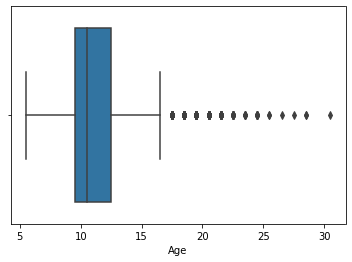

In [77]:
sns.boxplot(x=data['Age'])

In [78]:
Q1= data['Age'].quantile(0.25)
Q2=data['Age'].quantile(0.75)
print(Q1,Q2)

9.5 12.5


In [79]:
IQR=Q2-Q1
IQR

3.0

In [80]:
upper_limit =Q2 + 1.5*IQR
lower_limit =Q1 - 1.5*IQR
upper_limit
lower_limit

5.0

In [81]:
data["Age"] = np.where(data["Age"]<lower_limit,6.52,data["Age"])

<AxesSubplot:xlabel='Age'>

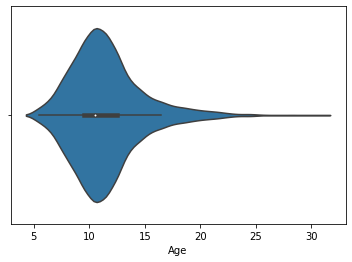

In [82]:
data["Age"] = np.where(data["Age"]<lower_limit,6.52,data["Age"])
sns.violinplot(x=data["Age"])

# 7.CHECK FOR CATEGORICAL COLUMN AND PERFORM ENCODING

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
oneh = OneHotEncoder()
data['Age'] = le.fit_transform(data['Age'])

In [13]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,14
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,6
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,8
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,9
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,6


# 8.SPLIT THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLE

In [104]:
X=data.drop(columns=['Age'],axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [15]:
Y=data['Age']
Y

0       14
1        6
2        8
3        9
4        6
        ..
4172    10
4173     9
4174     8
4175     9
4176    11
Name: Age, Length: 4177, dtype: int64


# 9.SCALE THE INDEPEDENT VARIABLE

In [17]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(X), columns=X.columns)
X_Scaled.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1.151980,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,1.151980,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,-1.280690,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,1.151980,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-0.064355,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757


# 10. SPLIT THE DATA INTO TRAINING AND TEST DATA

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_Scaled, Y, test_size = 0.9, random_state = 0)
X_train

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
3398,1.151980,-1.324068,-1.238373,-1.303532,-1.240474,-1.233991,-1.177849,-1.212987
449,-1.280690,0.341509,0.474853,0.250672,-0.016809,0.025379,-0.197020,0.152092
2903,-1.280690,0.424788,0.172519,0.250672,0.097399,0.430901,-0.005416,-0.077816
941,-0.064355,-0.491279,-0.432149,-0.586208,-0.737752,-0.576145,-0.803766,-0.904048
2834,-1.280690,0.383148,0.172519,-0.227545,-0.095328,0.045655,-0.055598,-0.304132
...,...,...,...,...,...,...,...,...
1033,1.151980,1.049379,1.180300,1.087551,1.617803,1.374865,1.294753,1.711157
3264,-1.280690,1.091018,0.928354,0.011563,0.696995,0.816146,1.249133,0.331708
1653,1.151980,0.591345,0.424464,0.131117,0.265653,0.466947,0.236370,0.105392
2607,-1.280690,0.841182,0.827576,0.609334,0.608279,0.530028,0.510090,0.572393


In [81]:
X_train.shape

(417, 8)

In [82]:
Y_train.shape

(417,)

In [83]:
X_test

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
668,1.151980,0.216591,0.172519,0.370226,0.181016,-0.368878,0.569396,0.690940
1580,-0.064355,-0.199803,-0.079426,-0.466653,-0.433875,-0.443224,-0.343004,-0.325685
3784,1.151980,0.799543,0.726798,0.370226,0.870348,0.755318,1.764639,0.565209
463,-0.064355,-2.531611,-2.447709,-2.020857,-1.579022,-1.522362,-1.538247,-1.572219
2615,1.151980,1.007740,0.928354,0.848442,1.390405,1.415417,1.778325,0.996287
...,...,...,...,...,...,...,...,...
2107,-1.280690,1.257576,1.432245,0.967997,1.753426,0.913021,1.732705,2.594867
3166,-1.280690,0.966100,1.331467,0.848442,1.513791,1.205897,0.824867,1.696788
4105,-1.280690,1.590691,1.583412,0.967997,1.960429,2.183655,1.577597,2.153012
3125,1.151980,0.508067,0.525242,0.250672,0.769395,0.998631,0.323048,0.604724


In [84]:
X_test.shape

(3760, 8)

In [85]:
Y_test

668     12
1580     7
3784    10
463      4
2615    11
        ..
2107    14
3166    17
4105     8
3125     9
1514    10
Name: Age, Length: 3760, dtype: int64

In [86]:
Y_test.shape

(3760,)

In [87]:
X_train.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
3398,1.151980,-1.324068,-1.238373,-1.303532,-1.240474,-1.233991,-1.177849,-1.212987
449,-1.280690,0.341509,0.474853,0.250672,-0.016809,0.025379,-0.197020,0.152092
2903,-1.280690,0.424788,0.172519,0.250672,0.097399,0.430901,-0.005416,-0.077816
941,-0.064355,-0.491279,-0.432149,-0.586208,-0.737752,-0.576145,-0.803766,-0.904048
2834,-1.280690,0.383148,0.172519,-0.227545,-0.095328,0.045655,-0.055598,-0.304132


In [88]:
X_test.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
668,1.151980,0.216591,0.172519,0.370226,0.181016,-0.368878,0.569396,0.690940
1580,-0.064355,-0.199803,-0.079426,-0.466653,-0.433875,-0.443224,-0.343004,-0.325685
3784,1.151980,0.799543,0.726798,0.370226,0.870348,0.755318,1.764639,0.565209
463,-0.064355,-2.531611,-2.447709,-2.020857,-1.579022,-1.522362,-1.538247,-1.572219
2615,1.151980,1.007740,0.928354,0.848442,1.390405,1.415417,1.778325,0.996287


In [89]:
Y_train.head()

3398     8
449     17
2903     7
941      6
2834     7
Name: Age, dtype: int64

In [90]:
Y_test.head()

668     12
1580     7
3784    10
463      4
2615    11
Name: Age, dtype: int64

# 11. BUILD THE MODEL

In [91]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [92]:
model.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [93]:
y_predict = model.predict(X_test)

In [94]:
y_predict_train = model.predict(X_train)

# 12.TRAIN THE MODEL

In [95]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [96]:
print('Training accuracy: ',accuracy_score(Y_train,y_predict_train))

Training accuracy:  0.9904076738609112


# 13.TEST THE MODEL

In [97]:
print('Testing accuracy: ',accuracy_score(Y_test,y_predict))

Testing accuracy:  0.21941489361702127


# 14. MEASURE THE PERFORMANCE USING METRICS

In [99]:
pd.crosstab(Y_test,y_predict)

col_0,2,3,4,5,6,7,8,9,10,11,...,13,14,15,16,17,18,19,20,21,22
Age,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17,14,8,9,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,17,25,28,22,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,11,25,66,91,17,16,4,2,0,...,2,0,0,0,0,0,0,0,0,0
6,1,3,18,74,119,72,49,12,6,0,...,1,0,0,0,0,0,0,0,0,0
7,1,1,5,35,85,172,116,62,28,0,...,1,0,2,1,0,0,1,0,0,0
8,0,0,2,14,41,178,178,133,45,6,...,0,1,6,1,1,0,0,0,1,0


In [102]:
print(classification_report(Y_train,y_predict_train))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        36
           7       0.98      1.00      0.99        57
           8       0.99      0.97      0.98        77
           9       0.97      0.99      0.98        70
          10       1.00      1.00      1.00        49
          11       1.00      0.94      0.97        16
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00         8
          16       1.00      1.00      1.00         6
          17       1.00      1.00      1.00         8
          18       1.00      1.00      1.00         1
          19       1.00    